In [1]:
cd /home/ubuntu/FedEM/

/home/ubuntu/FedEM


In [2]:

from utils.utils import *
from utils.constants import *
from utils.args import *
from run_experiment import * 

from torch.utils.tensorboard import SummaryWriter

# Import General Libraries
import os
import argparse
import torch
import copy
import pickle
import random
import numpy as np
import pandas as pd
from models import *

# Import Transfer Attack
from transfer_attacks.Personalized_NN import *
from transfer_attacks.Params import *
from transfer_attacks.Transferer import *
from transfer_attacks.Args import *
from transfer_attacks.TA_utils import *

import numba 
import matplotlib


In [13]:
# Generating Empty Aggregator to be loaded 

setting = 'FedAvg'

if setting == 'FedEM':
    nL = 3
else:
    nL = 1

# Manually set argument parameters
args_ = Args()
args_.experiment = "femnist"
args_.method = setting
args_.decentralized = False
args_.sampling_rate = 1.0
args_.input_dimension = None
args_.output_dimension = None
args_.n_learners= nL
args_.n_rounds = 10
args_.bz = 128
args_.local_steps = 1
args_.lr_lambda = 0
args_.lr =0.01
args_.lr_scheduler = 'multi_step'
args_.log_freq = 10
args_.device = 'cuda'
args_.optimizer = 'sgd'
args_.mu = 0
args_.communication_probability = 0.1
args_.q = 1
args_.locally_tune_clients = False
args_.seed = 1234
args_.verbose = 1
args_.save_path = 'weights/cifar/dummy/'
args_.validation = False

# Generate the dummy values here
aggregator, clients = dummy_aggregator(args_, num_user=50)

==> Clients initialization..
===> Building data iterators..


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 719/719 [00:01<00:00, 686.90it/s]


===> Initializing clients..


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 719/719 [00:07<00:00, 99.28it/s]


==> Test Clients initialization..
===> Building data iterators..


0it [00:00, ?it/s]


===> Initializing clients..


0it [00:00, ?it/s]


++++++++++++++++++++++++++++++
Global..
Train Loss: 4.149 | Train Acc: 1.743% |Test Loss: 4.151 | Test Acc: 1.470% |
++++++++++++++++++++++++++++++++++++++++++++++++++
################################################################################


In [14]:
num_records = []
for c in clients:
    num_records+=[c.train_iterator.dataset.targets.shape[0]]

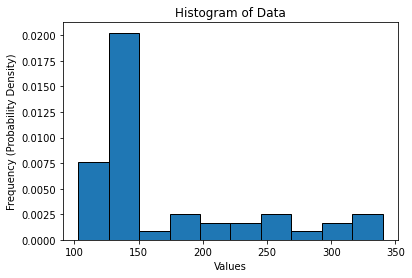

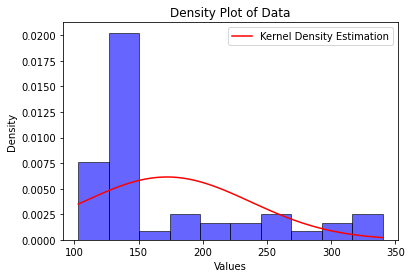

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace this with your actual list of values)
data = num_records

# Plotting histogram
plt.hist(data, bins=10, density=True, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency (Probability Density)')
plt.title('Histogram of Data')
plt.show()

# Alternatively, plot density plot (kernel density estimation)
plt.figure()
plt.hist(data, bins=10, density=True, alpha=0.6, color='blue', edgecolor='black')
plt.plot(np.linspace(min(data), max(data), 100), 
         np.exp(-0.5*((np.linspace(min(data), max(data), 100) - np.mean(data)) / np.std(data))**2) / (np.std(data) * np.sqrt(2 * np.pi)),
         label='Kernel Density Estimation', color='red')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot of Data')
plt.legend()
plt.show()


In [16]:
np.sum(data)

8604

In [20]:
data

[135,
 144,
 135,
 282,
 128,
 227,
 192,
 252,
 128,
 135,
 129,
 137,
 294,
 244,
 188,
 103,
 257,
 220,
 124,
 140,
 300,
 145,
 256,
 136,
 130,
 105,
 137,
 122,
 340,
 158,
 143,
 142,
 118,
 127,
 330,
 212,
 180,
 142,
 324,
 126,
 133,
 124,
 130,
 122,
 144,
 146,
 112,
 136,
 144,
 146]